 ### Create new note book

In [1]:
import numpy as np 
import pandas as pd
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [91]:
pip install BeautifulSoup4


The following command must be run outside of the IPython shell:

    $ pip install BeautifulSoup4

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


##  Scrape the Wikipedia page

In [92]:
#Get the link from wiki and import BeautifulSoup
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url)

In [7]:
#Find table
My_table =  soup.find("table",{"class":"wikitable sortable"})

In [8]:
#Get a list of Borough
Borough=[]
for row in My_table.findAll('td')[1::3]:
    a = row.text 
    Borough.append(a)
    
#Get a list of Postal Code
postalcode=[]
for row in My_table.findAll('td')[::3]:
    a = row.text 
    postalcode.append(a)

    #Get a list of Neighborhood
Neighborhood=[]
for row in My_table.findAll('td')[2::3]:
    a = row.text
    b = a.strip('\n')
    Neighborhood.append(b)


In [9]:
#Fill in Neighborhood as Borough if Neighborhood is 'Not assigned'
for (i,item) in enumerate(Neighborhood) :
    if item =='Not assigned':
        Neighborhood[i] = Borough[i]

## Create Data Frame

In [10]:
#Create a Data frame from created lists
df = pd.DataFrame()
df['PostalCode'] = postalcode
df['Borough'] = Borough
df['Neighborhood'] = Neighborhood


In [11]:
#Drop row if Borough is 'Not assigned'
df.drop(df[df['Borough']== "Not assigned"].index,axis = 0, inplace = True)

In [12]:
df = df.reset_index()
df.drop(['index'], axis=1, inplace = True)

In [13]:
df1= df.groupby(['PostalCode','Borough']).agg({'Neighborhood':lambda x: ','.join(x)})
df2 = df1.reset_index()

In [14]:
df2.shape

(103, 3)

## Adding Latitude and Longitude to Data Frame

In [16]:
read = pd.io.parsers.read_csv("http://cocl.us/Geospatial_data")
df3 = pd.merge(df2, read, left_on='PostalCode', right_on='Postal Code', how ='left')
df3.drop(['Postal Code'], axis=1)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


##  Explore and cluster neighborhood in Toronto

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


folium-0.5.0         | 45 KB     | ##################################### | 1

In [18]:
address = 'Toronto'


geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [22]:
map_tor = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df3['Latitude'], df3['Longitude'], df3['Borough'], df3['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

### Creat Data Frame with boroughs that contain the word Toronto

In [19]:
df4 = df3[df3.Borough.str.contains('Toronto')]
df5 = df4.reset_index()
df5.drop('index', axis = 1, inplace = True)
df5.drop('Postal Code', axis = 1, inplace = True)
df5

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049


In [19]:
df5.Neighborhood.unique() 

array(['The Beaches', 'The Danforth West,Riverdale',
       'The Beaches West,India Bazaar', 'Studio District',
       'Lawrence Park', 'Davisville North', 'North Toronto West',
       'Davisville', 'Moore Park,Summerhill East',
       'Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West',
       'Rosedale', 'Cabbagetown,St. James Town', 'Church and Wellesley',
       'Harbourfront', 'Ryerson,Garden District', 'St. James Town',
       'Berczy Park', 'Central Bay Street', 'Adelaide,King,Richmond',
       'Harbourfront East,Toronto Islands,Union Station',
       'Design Exchange,Toronto Dominion Centre',
       'Commerce Court,Victoria Hotel', 'Roselawn',
       'Forest Hill North,Forest Hill West',
       'The Annex,North Midtown,Yorkville',
       'Harbord,University of Toronto',
       'Chinatown,Grange Park,Kensington Market',
       'CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara',
       'Stn A PO Boxes 25 The Esplanad

In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
CLIENT_ID = 'CNKKH5SQE14KE34OKDVU1YO5BSDK1SWO1OOVAI1AQ51NB34K' # your Foursquare ID
CLIENT_SECRET = 'JDJ4FAC4P3HAMG0H04VJVT0U5F2WTYK2QRSAA3TMBVYODNWN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CNKKH5SQE14KE34OKDVU1YO5BSDK1SWO1OOVAI1AQ51NB34K
CLIENT_SECRET:JDJ4FAC4P3HAMG0H04VJVT0U5F2WTYK2QRSAA3TMBVYODNWN


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit = 1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
Toronto_venues = getNearbyVenues(names=df5['Neighborhood'],
                                   latitudes=df5['Latitude'],
                                   longitudes=df5['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

In [28]:
print(Toronto_venues.shape)
Toronto_venues.head()


(1721, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
2,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
3,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


In [31]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Berczy Park,56,56,56,56,56,56
"Brockton,Exhibition Place,Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,16,16,16,16,16,16
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",17,17,17,17,17,17
"Cabbagetown,St. James Town",49,49,49,49,49,49
Central Bay Street,82,82,82,82,82,82
"Chinatown,Grange Park,Kensington Market",84,84,84,84,84,84
Christie,18,18,18,18,18,18


In [32]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
Toronto_onehot.shape

(1721, 241)

In [34]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.shape

(39, 241)

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Find each neighbor hood with top 5 common venue

In [41]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

----Adelaide,King,Richmond----
             venue  freq
0      Coffee Shop  0.06
1             Café  0.05
2              Bar  0.04
3  Thai Restaurant  0.04
4       Restaurant  0.03


----Berczy Park----
               venue  freq
0        Coffee Shop  0.09
1       Cocktail Bar  0.04
2  French Restaurant  0.04
3               Café  0.04
4        Cheese Shop  0.04


----Brockton,Exhibition Place,Parkdale Village----
                venue  freq
0                Café  0.14
1      Breakfast Spot  0.09
2         Coffee Shop  0.09
3              Bakery  0.05
4  Italian Restaurant  0.05


----Business Reply Mail Processing Centre 969 Eastern----
           venue  freq
0     Comic Shop  0.06
1  Auto Workshop  0.06
2           Park  0.06
3     Restaurant  0.06
4  Moving Target  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3

### Top 10 venues for each group of neighborhood

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Bar,Thai Restaurant,Burger Joint,Steakhouse,Sushi Restaurant,Bakery,Cosmetics Shop,Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Café,Farmers Market,Cheese Shop,Seafood Restaurant,French Restaurant,Steakhouse,Beer Bar
2,"Brockton,Exhibition Place,Parkdale Village",Café,Breakfast Spot,Coffee Shop,Furniture / Home Store,Burrito Place,Stadium,Restaurant,Italian Restaurant,Bar,Bakery
3,Business Reply Mail Processing Centre 969 Eastern,Pizza Place,Auto Workshop,Comic Shop,Moving Target,Restaurant,Butcher,Burrito Place,Brewery,Skate Park,Spa
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Boat or Ferry,Coffee Shop,Rental Car Location,Sculpture Garden,Boutique,Plane


### Cluster Neighborhood

In [66]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

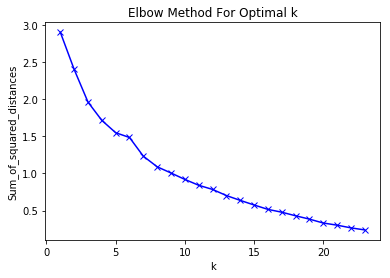

Optimal k  is 5


In [67]:
Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,24)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


print ("Optimal k  is 5")

### Cluster Toronto Neighnorhood with optimal k 

In [68]:
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe

print(kmeans.labels_[0:10] )





[0 0 0 0 0 0 0 0 0 0]


In [69]:
neighborhoods_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)

In [70]:
# add clustering labels

Toronto_merged = df5 
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head(50) # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Pub,Health Food Store,Other Great Outdoors,Trail,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bookstore,Furniture / Home Store,Frozen Yogurt Shop,Grocery Store,Brewery,Bubble Tea Shop
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,0,Sandwich Place,Pizza Place,Steakhouse,Sushi Restaurant,Food & Drink Shop,Brewery,Fish & Chips Shop,Ice Cream Shop,Pub,Movie Theater
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,American Restaurant,Italian Restaurant,Gastropub,Brewery,Bakery,Bar,Stationery Store,Fish Market
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,2,Photography Studio,Park,Construction & Landscaping,Swim School,Bus Line,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,Department Store,Breakfast Spot,Food & Drink Shop,Park,Hotel,Gym,Sandwich Place,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,0,Clothing Store,Coffee Shop,Yoga Studio,Chinese Restaurant,Spa,Fast Food Restaurant,Sporting Goods Shop,Mexican Restaurant,Salon / Barbershop,Diner
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Dessert Shop,Sandwich Place,Pizza Place,Café,Gym,Italian Restaurant,Sushi Restaurant,Coffee Shop,Indoor Play Area,Deli / Bodega
8,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160,1,Playground,Park,Tennis Court,Restaurant,Women's Store,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Donut Shop
9,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049,0,Coffee Shop,Pub,Liquor Store,American Restaurant,Restaurant,Fried Chicken Joint,Sports Bar,Supermarket,Sushi Restaurant,Pizza Place


### Examine Cluster 

In [88]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0]


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bookstore,Furniture / Home Store,Frozen Yogurt Shop,Grocery Store,Brewery,Bubble Tea Shop
2,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,0,Sandwich Place,Pizza Place,Steakhouse,Sushi Restaurant,Food & Drink Shop,Brewery,Fish & Chips Shop,Ice Cream Shop,Pub,Movie Theater
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,American Restaurant,Italian Restaurant,Gastropub,Brewery,Bakery,Bar,Stationery Store,Fish Market
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,Department Store,Breakfast Spot,Food & Drink Shop,Park,Hotel,Gym,Sandwich Place,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,0,Clothing Store,Coffee Shop,Yoga Studio,Chinese Restaurant,Spa,Fast Food Restaurant,Sporting Goods Shop,Mexican Restaurant,Salon / Barbershop,Diner
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Dessert Shop,Sandwich Place,Pizza Place,Café,Gym,Italian Restaurant,Sushi Restaurant,Coffee Shop,Indoor Play Area,Deli / Bodega
9,M4V,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049,0,Coffee Shop,Pub,Liquor Store,American Restaurant,Restaurant,Fried Chicken Joint,Sports Bar,Supermarket,Sushi Restaurant,Pizza Place
11,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675,0,Coffee Shop,Park,Café,Restaurant,Italian Restaurant,Bakery,Pizza Place,Pub,Breakfast Spot,Diner
12,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Fast Food Restaurant,Gym,Dance Studio,Pub,Hotel
13,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Café,Breakfast Spot,Restaurant,Mexican Restaurant,Theater,Farmers Market


In [90]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.383160,1,Playground,Park,Tennis Court,Restaurant,Women's Store,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Donut Shop
10,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,1,Park,Trail,Playground,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store


In [82]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2,Park,Playground,Trail,Women's Store,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
23,M5P,Central Toronto,"Forest Hill North,Forest Hill West",43.696948,-79.411307,2,Park,Jewelry Store,Trail,Sushi Restaurant,Women's Store,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [83]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,M5N,Central Toronto,Roselawn,43.711695,-79.416936,3,Home Service,Garden,Women's Store,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [84]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,M4T,Central Toronto,"Moore Park,Summerhill East",43.689574,-79.38316,4,Restaurant,Playground,Trail,Women's Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


### Create Data Frame for house price in Toronto's district


In [44]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto').text
soup1 = BeautifulSoup(url)

In [45]:
table2 =  soup1.find("table",{"class":"wikitable sortable"})

In [46]:
District =[]
for row in table2.findAll('td')[0::2]:
    a = row.text
    b = a.strip('\n')
    District.append(b)

    
District_name=[]
for row in table2.findAll('td')[1::2]:
    a = row.text
    b = a.strip('\n')
    District_name.append(b)
    




In [47]:
House_price = [800800, 1354800 ,1623800, 1529300, 1125000, 923000,765700,1402900, 1121700, 1004300 ,934900, 924000 , 832400, 1114000,1111400,  863500 , 711600, 694600 , 775500 ,   683900, 667300, 777000, 630200,1064400,1053400 , 778300 , 705100 , 629500, 686200, 1044700, 949300, 653700 , 633700  ]

In [55]:
df_1 = pd.DataFrame()
df_1['District_code'] = District
df_1['Neighborhood_included'] = District_name
df_1['House_price']=House_price
df_2 = df_1.sort_values(by='House_price')




In [56]:
df_1[df_1['House_price']== min(df_1['House_price'])]
df_1['Neighborhood_included'][27]

'Downsview, Humber Summit, Humbermede (Emery), Jane and Finch (Black Creek or Glenfield-Jane Heights), York University Heights'

In [50]:
print ("Average house price for all Toronto's district is", df_1['House_price'].mean())

Average house price for all Toronto's district is 926360.6060606061


In [51]:
df_1[df_1['House_price']== max(df_1['House_price'])]

,District_code,Neighborhood_included,House_price
2,C03,"Forest Hill South, Oakwood–Vaughan, Humewood–C...",1623800


In [52]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

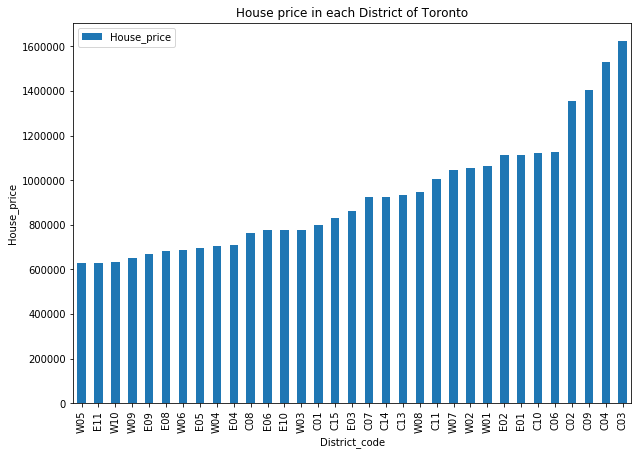

In [86]:
df_2.set_index('District_code')
df_2.plot(kind='bar', figsize=(10, 7))


plt.xlabel('District_code') # add to x-label to the plot
plt.ylabel('House_price') # add y-label to the plot
plt.title('House price in each District of Toronto') # add title to the plot

plt.xticks(np.arange(33), (df_2['District_code']))

plt.show()